<a href="https://colab.research.google.com/github/Explorer9/INFO5731_FALL2020/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, **select two models** and write a python program to **identify the top 20 topics (with 15 words for each topic) in the dataset**. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1)   Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2)   Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3)   HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4)   SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5)   Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6)   LDA2VEC: https://github.com/cemoody/lda2vec

(7)   BERTopic: https://github.com/MaartenGr/BERTopic

(8)   LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9)   Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)


**The following information should be reported:**

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster. 

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis


In [ ]:
import pandas as pd
import json
file_name=[]
df=pd.DataFrame()
reviews=[]
ratings=[]
path='/content/drive/MyDrive/Assign_4_data_5731/data'
import os
for root, dirs, files in os.walk(path, topdown=False):
  for i in files:
    f=open('/content/drive/MyDrive/Assign_4_data_5731/data/'+i,)
    data=json.load(f)
    print(i)
    for j in data:
      ratings.append(j['stars'])
      reviews.append(j['text'])
      

In [ ]:
df=pd.DataFrame()
df['reviews']=reviews
df['ratings']=ratings
print("reviews:",len(reviews))
print("ratings",len(ratings))

In [ ]:
df.to_csv("Data.csv")

In [3]:
!git clone "https://github.com/dongwookim-ml/python-topic-model.git"

Cloning into 'python-topic-model'...
remote: Enumerating objects: 357, done.
remote: Total 357 (delta 0), reused 0 (delta 0), pack-reused 357
Receiving objects: 100% (357/357), 18.75 MiB | 13.68 MiB/s, done.
Resolving deltas: 100% (181/181), done.


In [4]:
import sys
sys.path.insert(0, '/content/python-topic-model')


In [6]:
reviews=[]
for i in df['reviews']:
  reviews.append(i)

In [7]:
df=df.sample(n=50000,random_state=1) # sampled 10% of the data for faster execution 

Supervised LDA

In [8]:
import os
import logging

import numpy as np
import matplotlib.pyplot as plt

from ptm import GibbsSupervisedLDA
from ptm.nltk_corpus import get_ids_cnt
from ptm.utils import convert_cnt_to_list, get_top_words

%matplotlib inline  

logger = logging.getLogger('GibbsSupervisedLDA')
logger.propagate = False

In [9]:
reviews=df['reviews']
ratings=df['ratings']

In [25]:

import nltk
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
voca, word_ids, word_cnt = get_ids_cnt(reviews)
corpus = convert_cnt_to_list(word_ids, word_cnt)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


num doc 50000 num_voca 20060


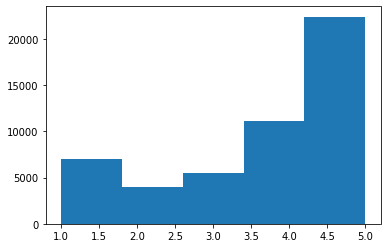

max rating 5.0 	min rating 1.0


2020-12-04 02:01:11 INFO:GibbsSupervisedLDA:[ITER] 0,	MAE:0.25,	log_likelihood:-20127177.13
2020-12-04 02:02:57 INFO:GibbsSupervisedLDA:[ITER] 1,	MAE:0.25,	log_likelihood:-19492483.35
2020-12-04 02:04:40 INFO:GibbsSupervisedLDA:[ITER] 2,	MAE:0.26,	log_likelihood:-19087337.95
2020-12-04 02:06:24 INFO:GibbsSupervisedLDA:[ITER] 3,	MAE:0.27,	log_likelihood:-18808104.03
2020-12-04 02:08:07 INFO:GibbsSupervisedLDA:[ITER] 4,	MAE:0.28,	log_likelihood:-18598900.28
2020-12-04 02:09:50 INFO:GibbsSupervisedLDA:[ITER] 5,	MAE:0.28,	log_likelihood:-18434482.01
2020-12-04 02:11:35 INFO:GibbsSupervisedLDA:[ITER] 6,	MAE:0.28,	log_likelihood:-18299187.91
2020-12-04 02:13:20 INFO:GibbsSupervisedLDA:[ITER] 7,	MAE:0.28,	log_likelihood:-18180433.42
2020-12-04 02:15:03 INFO:GibbsSupervisedLDA:[ITER] 8,	MAE:0.29,	log_likelihood:-18079419.43
2020-12-04 02:16:46 INFO:GibbsSupervisedLDA:[ITER] 9,	MAE:0.29,	log_likelihood:-17988011.54
2020-12-04 02:18:30 INFO:GibbsSupervisedLDA:[ITER] 10,	MAE:0.29,	log_likelihood:

KeyboardInterrupt: ignored

In [ ]:
n_doc = len(corpus)
n_voca = voca.size
print('num doc', n_doc, 'num_voca', n_voca)
plt.hist(ratings, bins=5)
plt.show()
print('max rating', np.max(ratings), '\tmin rating', np.min(ratings))
n_topic = 20
r_var = 0.1

model = GibbsSupervisedLDA(n_doc, n_voca, n_topic, sigma=r_var)
model.fit(corpus, ratings)

In [ ]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
dicti=gensim.corpora.Dictionary.load('dictionary.dict')
vis = pyLDAvis.gensim.prepare(model, corpus, dicti)
vis

In [ ]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=15)
    print('Eta', model.eta[ti] ,'Topic', ti ,':\t', ','.join(top_words))

Eta -4.601662012098114 Topic 5 :	 ordered,chicken,salad,restaurant,like,would,meal,steak,menu,nothing,meat,eat,table,dinner,ok
Eta -3.4153407996017093 Topic 11 :	 would,go,back,never,like,bad,could,get,time,one,people,room,left,experience,ever
Eta -3.086343270218516 Topic 16 :	 like,restaurant,ordered,better,would,get,bad,tea,go,coffee,got,pretty,also,really,much
Eta -1.7413596861124994 Topic 14 :	 ordered,chicken,like,restaurant,order,lunch,pizza,got,salad,one,menu,cheese,sauce,eat,came
Eta -0.2911998423138726 Topic 7 :	 go,get,even,like,back,would,one,order,way,time,money,better,going,ever,say
Eta 0.37202293875062437 Topic 3 :	 car,would,told,said,customer,never,store,get,time,could,call,back,manager,work,company
Eta 0.5406788497909882 Topic 13 :	 get,time,would,us,back,never,one,order,told,got,even,said,go,could,come
Eta 0.5548415988304843 Topic 1 :	 us,back,one,came,table,time,order,like,go,would,server,get,got,bar,even
Eta 1.064238338473579 Topic 0 :	 time,back,get,said,would,told

In [ ]:

'''
Topic-1: ordered chicken salad in menu of restaurent with meat and steak from dinner
Topic-2: one place available no room left bad expereince ever
Topic-3: Ordered tea and coffee in the restaurent it got pretty much really bad
Topic-4: order menu with one chicken, pizza, salad cheese sauce for lunch we ate and came
Topic-5: one would never get money back
Topic-6: manager never get time to call back customer 
Topic-7: order told to get back items in time
Topic-8: Customer could not call back time
Topic-9: time cannot get back the customer
Topic-10:Pretty much goot place with pizza, bar and hotel
Topic-11:one could get a good time with little people
Topic-12:Orderd chicken, rice, pizza with fresh sauce, soup, cream
Topic-13: one would get a really amazing time at this bar
Topic-14:first expereince was not very good
Topic-15:best recommended amazing loving place with amazing staff and delicious food completly awsome with love
Topic-16: one would get good time in car
Topic-17: orderd chicken, rice with fresh sauce, soup and cream
Topic-18: best amazing staff definately recommended to go back
Topic-19: Time and experience with get really amazing even for the first time
Topic-20:best lovely delicious food with amazing staff


HMM LDA

In [ ]:
import logging
from ptm.nltk_corpus import get_reuters_token_list_by_sentence
from ptm import HMM_LDA
from ptm.utils import get_top_words

logger = logging.getLogger('HMM_LDA')
logger.propagate=False

In [ ]:
corpus=[corpus]

In [ ]:
n_docs = len(corpus)
n_voca = len(voca)
n_topic = 20
n_class = 15
max_iter = 100
alpha = 0.1
beta = 0.01
gamma = 0.1
eta = 0.1
model = HMM_LDA(n_docs, n_voca, n_topic, n_class, alpha=alpha, beta=beta, gamma=gamma, eta=eta, verbose=False)
model.fit(corpus, max_iter=max_iter)

In [ ]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

Topic 0 :  delight,pathetic,history,tare,revealing,omelet,moderately,wandering,rave,bulk
Topic 1 :  advisor,overtly,curtis,coat,maintain,finch,dennis,oliver,dredging,loudly
Topic 2 :  lowering,scare,edge,focus,earth,july,baguette,mountain,fortunate,unhappy
Topic 3 :  shack,interest,robust,crumbly,weak,muffin,accordingly,spoon,lastly,kosher
Topic 4 :  convince,concern,entering,observant,mechanic,flag,factor,crumbly,fragrant,meaning
Topic 5 :  attraction,plumbing,duty,weekday,chapel,student,bye,ceiling,sublime,necessary
Topic 6 :  challenge,messy,hung,ed,complicated,coca,parcel,younger,frosted,central
Topic 7 :  confident,unable,lastly,interest,irene,bypass,noon,involved,ie,kudos
Topic 8 :  quickie,trail,suit,misted,shrunken,excessively,adventurous,glove,treasure,quiche
Topic 9 :  coca,japan,van,benefit,superior,maker,separates,sprite,stadium,slippery
Topic 10 :  preference,ski,foremost,meaning,stew,killer,report,rose,zucchini,folded
Topic 11 :  stressful,lake,stupid,extended,condition,c

# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0 

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here
df.loc[df['ratings']==5.0, 'sentiment'] = 'very_positve'
df.loc[df['ratings']==4.0, 'sentiment'] = 'Positve'
df.loc[df['ratings']==3.0, 'sentiment'] = 'Neutral'
df.loc[df['ratings']==2.0, 'sentiment'] = 'Negative'
df.loc[df['ratings']==1.0, 'sentiment'] = 'very_Negative'


In [ ]:
df=df.dropna()

In [ ]:
X = df.iloc[:, 1].values
y = df.iloc[:, 2].values
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

# Splitting into training & test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 0)

# Training the classifier & predicting on test data
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Classification metrics
from sklearn.metrics import accuracy_score, classification_report
classification_report = classification_report(y_test, y_pred)

print('\n Accuracy using Multinomial navie bayes: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy using Multinomial navie bayes:  0.5985333333333334

Classification Report

               precision    recall  f1-score   support

         1.0       0.67      0.74      0.70      2090
         2.0       0.50      0.03      0.05      1185
         3.0       0.37      0.05      0.08      1697
         4.0       0.38      0.34      0.36      3212
         5.0       0.66      0.91      0.76      6816

    accuracy                           0.60     15000
   macro avg       0.51      0.41      0.39     15000
weighted avg       0.55      0.60      0.53     15000



In [ ]:
from sklearn.svm import LinearSVC
svm_classifier=LinearSVC()
svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
classification_report=classification_report(y_test,y_pred)
print('\n Accuracy using support vector machine: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy using support vector machine:  0.6371333333333333

Classification Report

               precision    recall  f1-score   support

         1.0       0.69      0.78      0.74      2090
         2.0       0.40      0.23      0.29      1185
         3.0       0.39      0.29      0.33      1697
         4.0       0.45      0.40      0.43      3212
         5.0       0.75      0.86      0.80      6816

    accuracy                           0.64     15000
   macro avg       0.54      0.51      0.52     15000
weighted avg       0.61      0.64      0.62     15000



1.
#I selected features in the dataset using tf-idf matrix becuase tf-idf converts text into numerical array of frequency which means term frequency says how frequently does a word appeared in a document and inverse document frequency says how frequently does the word appears across all others in the dataset and also as this is the easiest way to find out the important terms and to concnetrate on these terms. 

# This is important becuase the values in the tfidf matrix are like weights which are added to the terms according to their occurence and importance which makes a model to identify which is more important for a particular sentiment and tends to predict the sentiment of a sentence easily.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here
import pandas as pd
train=pd.read_csv('/content/train.csv')
train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

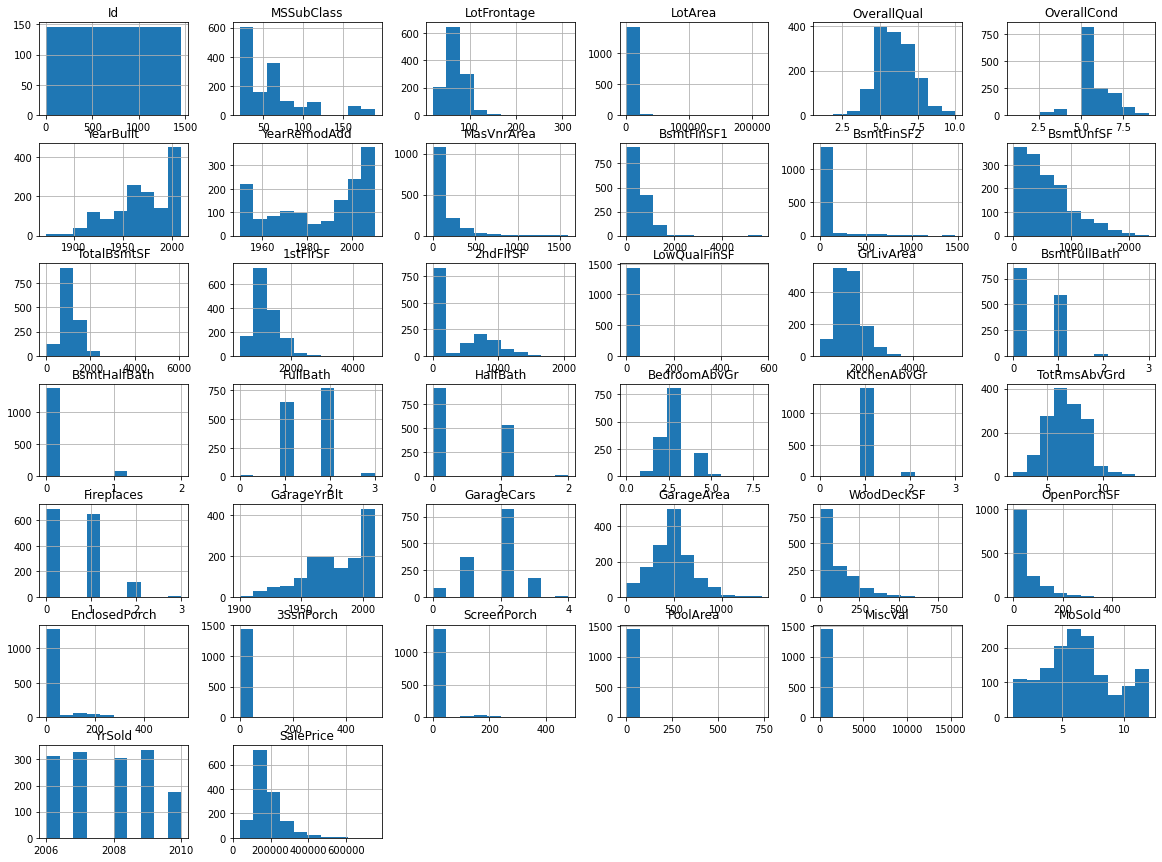

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=10, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
train_missing = train.isna()
train_num_missing = train_missing.sum()

In [ ]:
miss=train_num_missing/len(train)
miss=miss.sort_values()
miss.tail(10)

GarageFinish    0.055479
GarageYrBlt     0.055479
GarageType      0.055479
GarageCond      0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [ ]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageCond'],axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2003.0,RFn,2,548,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,1976.0,RFn,2,460,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2001.0,RFn,2,608,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,1998.0,Unf,3,642,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,2000.0,RFn,3,836,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,1999.0,RFn,2,460,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,1978.0,Unf,2,500,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1941.0,RFn,1,252,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1950.0,Unf,1,240,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
correlation=train.corr()
#correlation with targert variable
correlation["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [ ]:
train.fillna(train.mean(),inplace=True)
X=train[['Fireplaces','MasVnrArea','GarageYrBlt','YearRemodAdd','YearBuilt','TotRmsAbvGrd','FullBath','1stFlrSF','TotalBsmtSF','GarageArea','GarageCars','GrLivArea','OverallQual']]
Y=train[['SalePrice']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.7050


In [ ]:
test=pd.read_csv("/content/test.csv")
test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageCond'],axis=1)
test.fillna(test.mean(),inplace=True)
test_x=test[['Fireplaces','MasVnrArea','GarageYrBlt','YearRemodAdd','YearBuilt','TotRmsAbvGrd','FullBath','1stFlrSF','TotalBsmtSF','GarageArea','GarageCars','GrLivArea','OverallQual']]

y_pred=regressor.predict(test_x)
y_pred[:20]


array([[121690.1260001 ],
       [155514.99986051],
       [173104.72522433],
       [188181.91248921],
       [203034.34217006],
       [179885.80640825],
       [163808.68140181],
       [171541.52192993],
       [205527.97654407],
       [ 97438.63974576],
       [209400.26814308],
       [126223.92046709],
       [119987.68720818],
       [161983.42083162],
       [134707.58805638],
       [321864.69874074],
       [262548.99029649],
       [304870.83373567],
       [284706.26682052],
       [434457.66148398]])